In [50]:
from scipy.stats import binom
from scipy.stats import binom_test
from scipy.stats import probplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Binomial Distributions are very important within analytics as they are usually the culmination of previous experiments, resulting in questions like click/don't click, buy/don't buy, subscribe/don't subscribe etc. A central part of understanding binomial distributions is the existence of a set of trials, each with a definite probability of occurring, such as a coin flip being 50/50.\
Not all binomial trials need to have equal chances of occurring, so long as they add up to 1.0, for example 70/30 or 40/60.\
It is common to assign the 'success' outcome the number 1, with the other being assigned to 0. This is also true with the rarest outcome being assigned to 1, for example, fraudulent transactions are more rare than normal transactions so they would be assigned to 1 rather than 0. 

The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with specified probability (p). To simplify this, an example would be how likely is it that you achieve 0 sales (successes or 'x') within 200 clicks (trials or 'n') when the probability of a click becoming a sale is 0.02 (probability or 'p')?\
In this example, x=0, n=200 and p=0.02\
To answer this we plug these numbers into scipy.stats.binom

binom.pmf() stands for probability mass function, this will give us the exact probability of a specific number of events occurring, it will tell us the probability of exactly x=0 or x=2.
binom.cdf() stands for cumulative density function and this will tell us the probability of x or fewer events occurring, so the chances that 2 events or fewer will occur in 'n' trials.\ 

In [2]:
binom.pmf(0,n=200,p=0.02)

0.017587946605721567

As we used binom.cdf() the result is the probability that the event will occur 4 times or less, so it is more there is a 62% chance that the event will occur from 0 - 4 times. We can see the difference in results from using .pmf() and .cdf()\
Also, from experimenting with .pmf() we can see that using x=4 results in the highest probability result, using x<=3 or x>=5 results in the probability decreasing, this is because if we do (200 * 0.02) it equals 4.0. Therefore it would make sense that the chance of 4 successes occurring would be the highest.\
As you increase the 'x' variable for cdf, the probability increases, if the p value is quite low then there is less chance for 2 or less (x) successes to occur, however if you use a high x value such as 20, then it is quite likely that you will achieve less than 20 successes (0.99).

In [3]:
binom.pmf(4,n=200,p=0.02)

0.19734860696728865

In [4]:
binom.cdf(4, n=200, p=0.02)

0.6288435801288308

The mean of a binomial distribution is (n * p), this gives the most common number of successes to occur, demonstrated previously with 200 * 0.02 = 4, which had the highest probability of occurring.\
The variance n * p(1-p)  = (200 * 0.02) * (1-0.02) = 3.92
To get the standard deviation you just square root the variance 3.92 ** 0.5 = 1.98

In [5]:
mean = 200 * 0.02
var = (200*0.02)*(1-0.02)
std = var**0.5
print(mean)
print(var)
print(std)

4.0
3.92
1.9798989873223332


If n is large or p is close to 0.50 then a binomial distribution can be quite indistinguishable from a normal distribution, demonstrated below using the same mean, standard deviation and sample size as above.

In [6]:
norm = np.random.normal(loc=4, scale=1.98, size=200)

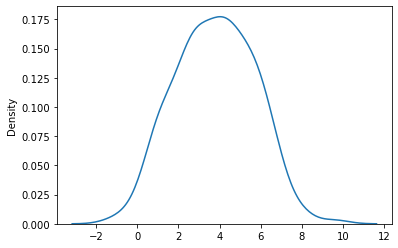

In [7]:
sns.kdeplot(norm)
plt.show()

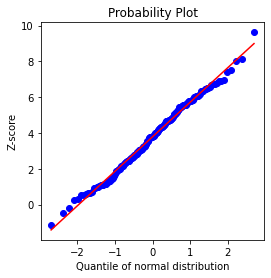

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = norm
probplot(norm_sample, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()

A more in-depth example would be visitors to a website, let's say that the probability of a visitor purchasing something when they visit a website is 0.1, or 10%. In a sample of 500 visitors you would expect there to be 50 purchases, but what if you only got 41? Is this different enough from the expected value to be statistically significant or just due to random chance?

We can investigate this using np.random.choice(). Here we have provided it with 2 choices, either 'y' or 'n' with 'y' representing a purchase. The size=1 means it only makes the choice once, and the p=[0.1,0.9] represents the probabilities of being chosen, they should add up to 1. 

In [25]:
one_visitor = np.random.choice(['y', 'n'], size=1, p=[0.1, 0.9])
print(one_visitor)

['n']


Setting the size to 10 means making 10 choices, with the probability of 0.1 for 'y' you would expect to see 'y' once per running, however it can vary with sometimes there being zero 'y's or even two 'y's. Run it enough times and you could potentially see such extremes as nine or ten 'y's. However, the consensus is that it will generally be about 1 'y'. 

In [32]:
ten_visitors = np.random.choice(['y', 'n'], size=10, p=[0.1, 0.9])
print(ten_visitors)

['n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n']


Here we use a size of 500 to simulate our initial problem. Running it a number of times and using np.sum() to find the number of 'y's will give values ranging from about 40 to 60.

In [39]:
fivehundred_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
np.sum(fivehundred_visitors == 'y')

44

We can use a for loop to work out a p-value. Here we have run the experiment 10000 times and then appended the number of 'y' values to a list named 'outcomes'. Each value within the list is a result of the experiment and from these we can figure out the likelihood of a specific or range of values occurring. 

In [42]:
outcomes = []

for i in range(10000): 
    visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    outcomes.append(np.sum(visitors == 'y'))
print(outcomes[:5])

[36, 51, 55, 50, 61]


In [44]:
outcomes = np.array(outcomes)
p_value = np.sum((outcomes <= 41)/len(outcomes))
print(p_value)

0.0988


The result should be around 0.1, or 10%. This shows that the probability of observing 41 or less purchases in a size of 500 with a 10% pick rate is around 0.1. As this is not below 0.05 which is the usual scientific standard for determining statistical significance, we can say that this result is not statistically significant. 

Using percentiles, we can also determine the confidence intervals. Here we have calculated the 95% confidence interval of the range of values within outcomes, this lets us say that we can be 95% certain that out of 500 visitors, we can expect between 37 and 64 purchases. If we change the confidence interval to 90% for example, the numbers expected get higher as we are less certain that the numbers will be closer to the expected value of 50. In this case, we are only 90% certain that we will get between 39 and 61 sales.\
We can also see that our original value of 41 is within the 95% confidence interval and that it is likely it occurred due to random chance. 

In [47]:
print(np.percentile(outcomes, [2.5,97.5]))
print(np.percentile(outcomes, [5,95]))

[37. 64.]
[39. 61.]


This is only a one-sided test however, as we were determining the p-value of obtaining a result of 41 or less. A two-sided test would also include going higher than the expected value of 50, so 59 or higher or 41 or less (they are both 9 away from the expected value). We can include this in our looping test using '|'. This sums the number of values in outcomes that are above 41 or 59, then divides them by the total length of outcomes to result in a p-value. As we can see, the p_value is nearly twice as big as the one-sided test. This emphasises how we must be certain about what question we are asking before performing any testing to avoid obtaining the wrong result. It could be the difference between determining the result is statistically significant or a product of random chance. 

In [49]:
p_value = np.sum((outcomes <= 41) | (outcomes >= 59))/len(outcomes)
print(p_value)

0.2051


We can also use scipy.stats.binom_test to calculate this all automatically. The parameters are the number of successes, the size of the group and the probability of a success occurring. binom_test is set to default as two-sided, but this can be changed with alternative='less' for lower one-sided or 'greater' for higher one-sided. 

In [54]:
binom_test(41, n=500, p=0.1)

0.20456397700678308

In [55]:
binom_test(41, n=500, p=0.1, alternative='less')

0.1001135269756488

Here we can find the probability of achieving exactly 41 successes using binom.pmf(). Using cdf() is the same as running a one-sided test. 

In [51]:
binom.pmf(41,n=500,p=0.1)

0.025024237316633308

In [53]:
binom.cdf(41,n=500,p=0.1)

0.1001135269756488